In [1]:
from trackml.dataset import load_event


In [2]:
hits, cells, particles, truth = load_event('kaggleData/train_100_events/event000001000')


In [3]:
hits.head()

hit_id          x         y       z  volume_id  layer_id  module_id
0       1 -64.409897 -7.163700 -1502.5          7         2          1
1       2 -55.336102  0.635342 -1502.5          7         2          1
2       3 -83.830498 -1.143010 -1502.5          7         2          1
3       4 -96.109100 -8.241030 -1502.5          7         2          1
4       5 -62.673599 -9.371200 -1502.5          7         2          1

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [5]:
detData = pd.read_csv("../trackingml/detectors.csv")

In [6]:
# Barrel IDs
barrelIDs = [(8,4,35),(13,4,0),(17,2,0)] # Format / (volumeID, nlayers) / cz of central module (for phi counting)

layerDataBarrel_oneModulePerRing = []

for bInfo in barrelIDs:
    volume_id = bInfo[0]
    for layItr in range(bInfo[1]):
        layer_id = 2*(layItr+1)
        layerDataBarrel_oneModulePerRing.append(
            detData[(detData["volume_id"] == volume_id) & (detData["layer_id"] == layer_id) & (detData["cz"] == bInfo[2])]
        )

nModulesInPhiBarrel = []
for ld in layerDataBarrel_oneModulePerRing:
    nModulesInPhiBarrel.append(len(ld))
nModulesInPhiBarrel

[16, 32, 52, 78, 40, 56, 78, 102, 120, 152]

In [7]:
layerDataBarrel = []


for bInfo in barrelIDs:
    volume_id = bInfo[0]
    for layItr in range(bInfo[1]):
        layer_id = 2*(layItr+1)
        layerDataBarrel.append(
            detData[(detData["volume_id"] == volume_id) & (detData["layer_id"] == layer_id)]
        )


In [8]:
# Endcap IDs
# Format / (volumeID, ndisks, nLayersR) / cz of central module (for phi counting)
endcapIDs = [(7,7,2),(9,7,2),
             (12,6,3),(14,6,3),
             (16,6,2),(18,6,2),
            ]
layerDataEndcap = []
nModulesInREndcap = []
for eInfo in endcapIDs:
    volume_id = eInfo[0]
    for diskItr in range(eInfo[1]):
        disk_id = 2*(diskItr+1)
        layerDataEndcap.append(
            detData[(detData["volume_id"] == volume_id) & (detData["layer_id"] == disk_id)]
        )
        nModulesInREndcap.append(eInfo[2])

In [9]:
from detectorGeo import detectorGeo
detGeo = detectorGeo()
detGeo.initFromFile(layerDataBarrel,nModulesInPhiBarrel,layerDataEndcap,nModulesInREndcap)

In [10]:
hits["x"]

0         -64.409897
1         -55.336102
2         -83.830498
3         -96.109100
4         -62.673599
5         -57.068699
6         -73.872299
7         -63.853500
8         -97.254799
9         -90.292900
10        -59.182999
11        -42.623901
12        -72.533997
13        -63.501202
14        -63.436501
15        -57.311901
16        -97.255699
17        -79.999397
18       -100.921997
19        -57.138802
20        -68.147102
21       -136.307999
22       -110.555000
23       -129.147995
24       -153.201996
25       -136.492004
26       -150.699005
27       -174.037994
28       -103.949997
29       -143.559006
             ...    
120909   -784.965027
120910   -801.228027
120911   -716.664978
120912   -862.252014
120913   -795.627014
120914   -805.374023
120915   -843.049988
120916   -791.070984
120917   -780.578979
120918   -780.581970
120919   -907.075012
120920   -852.927979
120921   -905.219971
120922   -852.567017
120923   -866.156982
120924   -809.760986
120925   -800

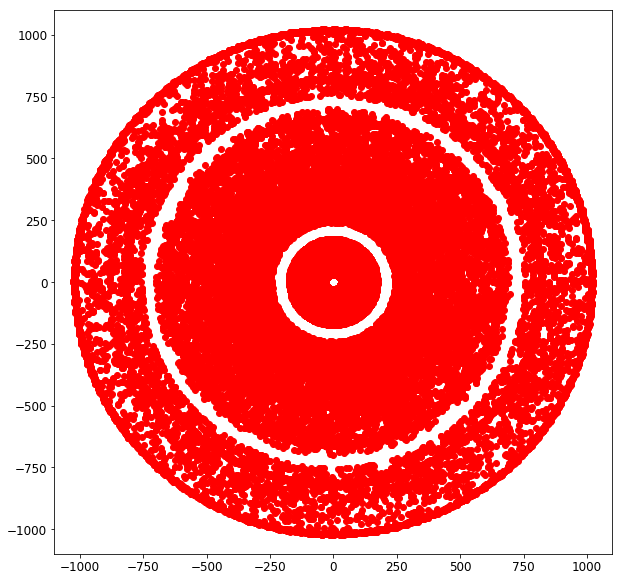

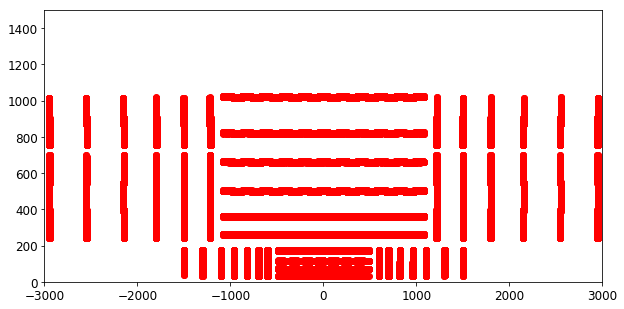

In [11]:
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 1100
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax,True)
plt.plot(hits["x"],hits["y"],'ro')

#for s in solutions:
#    color = "b" if (s[8] < 0) else "r"
#    plt.plot(s[0],s[1],color)

fig, ax = plt.subplots(1, figsize=(10,5))
zoom = 3000
ax.set_xlim((-zoom, zoom))
ax.set_ylim((0, zoom/2))

detGeo.drawDetectorZR(ax,True)

plt.plot(hits["z"],np.sqrt(hits["x"]**2+hits["y"]**2),'ro')    
#for s in solutions:
#    color = "b" if (s[8] < 0) else "r"
#    plt.plot(s[2],s[3],color)

In [12]:
from HTTrackFinder import HTTrackFinding


In [13]:
def getHTForTrackFinding(hitR,hitPhi,phi):
    #Convert 0-2Pi
    if hitPhi<0: hitPhi += 2*np.pi
    phi_circle = phi - np.pi/2
    return 2/hitR*(np.cos(hitPhi-phi_circle))

In [14]:
hits["r"] = np.sqrt(hits["x"]**2 + hits["y"]**2)
hits["phi"] = np.arctan2(hits["y"], hits["x"])

hits["phi"][(hits["phi"] <0)] = (hits["phi"] + 2*np.pi)

/Users/johnda/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [15]:
hits.head()

hit_id          x         y       z  volume_id  layer_id  module_id  \
0       1 -64.409897 -7.163700 -1502.5          7         2          1   
1       2 -55.336102  0.635342 -1502.5          7         2          1   
2       3 -83.830498 -1.143010 -1502.5          7         2          1   
3       4 -96.109100 -8.241030 -1502.5          7         2          1   
4       5 -62.673599 -9.371200 -1502.5          7         2          1   

           r       phi  
0  64.807045  3.252358  
1  55.339748  3.130112  
2  83.838287  3.155226  
3  96.461777  3.227130  
4  63.370335  3.290017

In [16]:
HTFinderPtPhi = HTTrackFinding(0,2*np.pi,200,-1.33*0.001,1.33*0.001,400,getHTFunction=getHTForTrackFinding,
                               nLayers=(len(detGeo.layers)+len(detGeo.disks)),
                               minHitsPerTrack=8,
                              ) 

#
# Loop on rec hits
# 
#for hitItr in range(len(hits)):
for index, row in hits.iterrows():   
    if index % 1000 == 0:
        print("hit Number:",index)
    
    # hitInfo format (hitID,xHits[hitItr],yHits[hitItr],zHits[hitItr],hitItr)

    hitID = row["hit_id"]
    hitX  = row["x"]
    hitY  = row["y"]

    hitVolID = int(row["volume_id"])
    hitLayID = int(row["layer_id"])
    globalLayID = detGeo.getGlobalLayerID(hitVolID,hitLayID)
    
    # convert to r and phi
    hitR = row["r"]
    hitPhi = row["phi"]
    
    HTFinderPtPhi.addHit(globalLayID, hitID, hitR, hitPhi)


#    
# Plot Truth
#
#for part in eventParticles:
#    # part format (trkI,pt,phi,theta,z0,q,6)
#    truePhi = part[2]
#    trueQ   = part[5]
#    trueRc  = part[1]    
#    #eventParticles.append((trkI,pt,phi,q,6))
#
#    ax.plot(truePhi,trueQ*1/trueRc,
#            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')


hit Number: 0
hit Number: 1000
hit Number: 2000
hit Number: 3000
hit Number: 4000
hit Number: 5000
hit Number: 6000
hit Number: 7000
hit Number: 8000
hit Number: 9000
hit Number: 10000


KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10))

X, Y = np.meshgrid(HTFinderPtPhi.xBins, HTFinderPtPhi.yBins)
cmap = plt.get_cmap('binary')

HTFinderPtPhi.combineLayerMaps()

#
#  Tracks
#
plt.figure(1)

ax.set_xlim(0,2*np.pi)
ax.set_ylim(-1.33*0.001,1.33*0.001)
H = np.array(HTFinderPtPhi.HitDB.combinedHitsCounts).T
im = ax.pcolormesh(X, Y, H,cmap=cmap)
fig.colorbar(im, ax=ax)

recoTracks = HTFinderPtPhi.findTracks()
for rT in recoTracks:
    recPhi  = rT[0]
    recQ    = rT[2]
    recCurv = rT[1]

    ax.plot(recPhi,recCurv,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')

        
plt.show()

In [ ]:
len(hits)

In [ ]:
hits.head()

In [ ]:
particles["pt"] = np.sqrt(particles["px"]**2+particles["py"]**2)


In [ ]:
print(len(particles[(particles["nhits"] > 8) & (particles["pt"] > 0.5)]))
print(len(particles[(particles["nhits"] > 8) & (particles["pt"] > 1.0)]))
print(len(particles[(particles["nhits"] > 8) & (particles["pt"] > 2.0)]))

In [ ]:
particles.head()

In [ ]:
from TrackHelper import getPhiCircle

# given global posision and phi range, return consistent 1/rC
def getHT(hitR, hitPhi, phi):
    # Convert 0-2Pi
    if hitPhi<0: hitPhi += 2*np.pi

    phi_circle = getPhiCircle(phi,1)

    f = 2/hitR*(np.cos(hitPhi-phi_circle))
    return f

In [ ]:
# given global posision and z0 range, return consistent theta
def getHT_ZR(hitZ, hitR, z):
    
        
    #f = np.arctan2((hitZ - z),hitR)
    #f[f<0] = f[f<0]+2*np.pi
    f = np.arctan2(hitR,(hitZ - z))
    return f

In [ ]:
# given global posision and z0 range, return consistent theta
def getHT_ZRForTracking(hitZ, hitR, z):
    #f = np.arctan2((hitZ - z),hitR)
    #f[f<0] = f[f<0]+2*np.pi
    f = np.arctan2(hitR,(hitZ - z))
    return f

In [ ]:
from HTTrackFinder import HTTrackFinding


HTFinderZThetaCoarse = HTTrackFinding(-150,150,100,15*np.pi/400,385*np.pi/400,200,getHTFunction=getHT_ZRForTracking,
                                      nLayers=(len(detGeo.layers)+len(detGeo.disks)),
                                      minHitsPerTrack=8)


#
# Loop on rec hits
# 
for index, row in hits.iterrows():   
    if index % 10000 == 0:
        print("hit Number:",index)
    
    # hitInfo format (hitID,xHits[hitItr],yHits[hitItr],zHits[hitItr],hitItr)

    hitID = row["hit_id"]
    #hitX  = row["x"]
    #hitY  = row["y"]
    hitZ  = row["z"]
    hitR  = row["r"]

    hitVolID = int(row["volume_id"])
    hitLayID = int(row["layer_id"])
    globalLayID = detGeo.getGlobalLayerID(hitVolID,hitLayID)

    # convert to r and phi
    HTFinderZThetaCoarse.addHit(globalLayID, hitID, hitZ, hitR,doRangeCut=False)



X, Y = np.meshgrid(HTFinderZThetaCoarse.xBins, HTFinderZThetaCoarse.yBins)
cmap = plt.get_cmap('binary')

HTFinderZThetaCoarse.combineLayerMaps()

In [ ]:
#    
# Plot Truth
#
for part in eventParticles:
    # part format (trkI,pt,phi,theta,z0,q,6)
    truePhi = part[2]
    trueQ   = part[5]
    trueRc  = part[1]    
    trueZ0  = part[4]
    trueTheta  = part[3]

    ax.plot(trueZ0,trueTheta,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')

In [ ]:
matchedHits = HTFinderZThetaCoarse.getHitsInBinDF(30,30,hits)
#matchedHits[0:10]

In [ ]:
print(len(matchedHits)/len(hits))
print(len(matchedHits))
print(len(hits))

In [ ]:
hits_IDs = hits["hit_id"]

In [ ]:
hits.head()

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 1100
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax,True)
plt.plot(matchedHits["x"],matchedHits["y"],'ro')

#for s in solutions:
#    color = "b" if (s[8] < 0) else "r"
#    plt.plot(s[0],s[1],color)

fig, ax = plt.subplots(1, figsize=(10,5))
zoom = 3000
ax.set_xlim((-zoom, zoom))
ax.set_ylim((0, zoom/2))

detGeo.drawDetectorZR(ax,True)

plt.plot(matchedHits["z"],np.sqrt(matchedHits["x"]**2+matchedHits["y"]**2),'ro')    
#for s in solutions:
#    color = "b" if (s[8] < 0) else "r"
#    plt.plot(s[2],s[3],color)

In [ ]:
HTFinderPtPhi = HTTrackFinding(0,2*np.pi,200,-1.33*0.001,1.33*0.001,400,getHTFunction=getHTForTrackFinding,
                               nLayers=(len(detGeo.layers)+len(detGeo.disks)),
                               minHitsPerTrack=8,
                              ) 

#
# Loop on rec hits
# 
#for hitItr in range(len(hits)):
for index, row in matchedHits.iterrows():   
    if index % 1000 == 0:
        print("hit Number:",index)
    
    # hitInfo format (hitID,xHits[hitItr],yHits[hitItr],zHits[hitItr],hitItr)

    hitID = row["hit_id"]
    hitX  = row["x"]
    hitY  = row["y"]

    hitVolID = int(row["volume_id"])
    hitLayID = int(row["layer_id"])
    globalLayID = detGeo.getGlobalLayerID(hitVolID,hitLayID)
    
    # convert to r and phi
    hitR = row["r"]
    hitPhi = row["phi"]
    
    HTFinderPtPhi.addHit(globalLayID, hitID, hitR, hitPhi)

In [ ]:
X, Y = np.meshgrid(HTFinderPtPhi.xBins, HTFinderPtPhi.yBins)
cmap = plt.get_cmap('binary')

HTFinderPtPhi.combineLayerMaps()

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10))
plt.figure(1)

ax.set_xlim(0,2*np.pi)
ax.set_ylim(-1.33*0.001,1.33*0.001)
H = np.array(HTFinderPtPhi.HitDB.combinedHitsCounts).T
im = ax.pcolormesh(X, Y, H,cmap=cmap)
fig.colorbar(im, ax=ax)

recoTracks = HTFinderPtPhi.findTracks()
for rT in recoTracks:
    recPhi  = rT[0]
    recQ    = rT[2]
    recCurv = rT[1]

    ax.plot(recPhi,recCurv,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')

        
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10))
plt.figure(1)

ax.set_xlim(0,2*np.pi)
ax.set_ylim(-1.33*0.001,1.33*0.001)
H = np.array(HTFinderPtPhi.HitDB.combinedHitsCounts).T
im = ax.pcolormesh(X, Y, H,cmap=cmap)
fig.colorbar(im, ax=ax)

        
plt.show()

In [ ]:
plt.hist(particles[particles["nhits"] > 5]["pt"], bins=np.linspace(0,1,100))

In [ ]:
particles[particles["nhits"] > 5]

In [ ]:
truth["tpt"] = np.sqrt(truth["tpx"]**2 + truth["tpy"]**2  )

In [ ]:

truth[(truth["weight"] > 0.0001) ].head(100)

In [ ]:
testPartHits = truth[(truth["particle_id"] == 4503737066323968)]
testPartHits

In [ ]:
testPart = particles[particles["particle_id"]==4503737066323968]
testPart

In [ ]:
1.8/(1/np.sqrt(4*np.pi/137))

e = np.sqrt(4*np.pi/137)
T_to_GeV2 = 1.97*10**(-16)
B_in_T = 1.89
B = B_in_T*T_to_GeV2
print(B)
#print(1./eB)
print(e)
pt = 1.058622
rc_inGeV = pt/(e*B)
rc = rc_inGeV/(5.06*10**(12))
print(rc)
print(rc/pt)

In [ ]:
from TrackHelper import drawTrackXY, drawTrackZR,drawTrack

z0 = testPart["vz"]
pt = testPart["pt"]
rc = pt/(e*B)/(5.06*10**(12))
pz = testPart["pz"]
q  = testPart["q"]
phi = np.arctan2(testPart["py"],testPart["px"])
print(phi)
theta = np.arctan(pt/pz)
print(theta)
print(pt)


fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 1100
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax,True)
#trk_rc  = 750
#trk_phi = 0*np.pi/400
#trk_q   = +1
#drawTrackXY(float(pt),float(phi),float(q),scale=1000)
print(pt*1000*2)
eB = 0.001*np.sqrt(4*np.pi/137)
print("Rc is ",rc)
drawTrackXY(float(rc),float(phi),float(q),scale=1000)

plt.plot(testPartHits["tx"],testPartHits["ty"],'ro')

#for s in solutions:
#    color = "b" if (s[8] < 0) else "r"
#    plt.plot(s[0],s[1],color)

fig, ax = plt.subplots(1, figsize=(10,5))
zoom = 3000
ax.set_xlim((-zoom, zoom))
ax.set_ylim((0, zoom/2))

detGeo.drawDetectorZR(ax,True)
drawTrackZR(theta,z0,1,zoom)

plt.plot(testPartHits["tz"],np.sqrt(testPartHits["tx"]**2+testPartHits["ty"]**2),'ro')    
#for s in solutions:
#    color = "b" if (s[8] < 0) else "r"
#    plt.plot(s[2],s[3],color)

In [ ]:
TwoGeVParts = particles[(particles["nhits"] > 10) & (particles["pt"] > 4) & (particles["q"]< 0)& (particles["pt"] < 5)]
TwoGeVParts = particles[(particles["particle_id"] == 864711744298156032)]
TwoGeVParts

In [ ]:
from TrackHelper import drawTrackXY, drawTrackZR,drawTrack


fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 1100
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax,True)



for index, row in TwoGeVParts.iterrows():
    
    
    #z0 = row["vz"]
    pt = row["pt"]
    rc = pt/(e*B)/(5.06*10**(12))
    pz = row["pz"]
    q  = row["q"]
    phi = np.arctan2(row["py"],row["px"])
    #theta = np.arctan(pt/pz)
    #drawTrackXY(float(rc),float(phi),float(q),scale=1000)
        
    trk_hits = truth[(truth["particle_id"] == row["particle_id"])]
    color = "r"
    if q < 0: color = "b"
    plt.plot(trk_hits["tx"],trk_hits["ty"],'ro')
    plt.plot(trk_hits["tx"],trk_hits["ty"], color)

fig, ax = plt.subplots(1, figsize=(10,5))
zoomRZ = 3000
ax.set_xlim((-zoomRZ, zoomRZ))
ax.set_ylim((0,zoomRZ/2))

detGeo.drawDetectorZR(ax,True)
    


for index, row in TwoGeVParts.iterrows():
    #z0 = row["vz"]
    #pt = row["pt"]
    #rc = pt/(e*B)/(5.06*10**(12))
    #pz = row["pz"]
    q  = row["q"]
    #phi = np.arctan2(row["py"],row["px"])
    #theta = np.arctan2(pt,pz)
    #if theta < 0: theta += 2*np.pi

    trk_hits = truth[(truth["particle_id"] == row["particle_id"])]
    #print(trk_hits)
    color = "r"
    if q < 0: color = "b"
    plt.plot(trk_hits["tz"],np.sqrt(trk_hits["tx"]**2+trk_hits["ty"]**2),'ro') 
    plt.plot(trk_hits["tz"],np.sqrt(trk_hits["tx"]**2+trk_hits["ty"]**2),color)     
    
#detGeo.drawDetectorZR(ax,True)
#drawTrackZR(theta,z0,1,zoom)

#plt.plot(testPartHits["tz"],np.sqrt(testPartHits["tx"]**2+testPartHits["ty"]**2),'ro')   